In [308]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [309]:
def load_mprofile(path):
    df = pd.read_csv(path,skiprows=1,delim_whitespace=True,header=None)

    # delete the first column
    df = df.drop(df.columns[0],axis=1)

    # rename the columns
    df.columns = ['memory','time']

    # make time relative to the start
    df['time'] = df['time'] - df['time'].min()

    # convert to GB
    df['memory'] = df['memory'] *0.00104858

    # smooth over n points
    # n = 1000
    # df['memory'] = df['memory'].rolling(window=n).mean()

    return df

In [310]:
new = load_mprofile('/home/kbrennan/cell_tracker/mprofile_20240419085634.dat')
old = load_mprofile('/home/kbrennan/cell_tracker/mprofile_20240419085556.dat')
hail = load_mprofile('/home/kbrennan/cell_tracker/mprofile_20240419084453.dat')
print(f'a reduction from {old.memory.max():.2f} to {new.memory.max():.2f} GB in memory usage was achieved which is a {100*(old.memory.max()-new.memory.max())/old.memory.max():.1f}% reduction')

a reduction from 27.81 to 28.21 GB in memory usage was achieved which is a -1.5% reduction


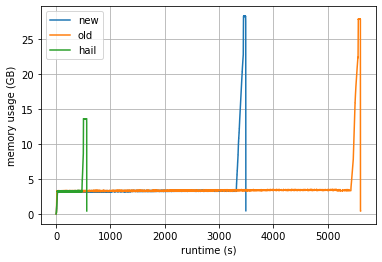

In [311]:
plt.plot(new.time,new.memory,label='new')
plt.plot(old.time,old.memory,label='old')
plt.plot(hail.time,hail.memory,label='hail')
plt.legend()
plt.ylabel('memory usage (GB)')
plt.xlabel('runtime (s)')
plt.grid()
# plt.yscale('log')